In [ ]:
%pip install wordcloud
%pip install nltk
%pip install numpy
%pip install pandas
%pip install spacy
%pip install textdistance
%pip install PyMuPDF
%pip uninstall openpyxl
%pip install docx2txt
%pip install docx2pdf
%pip install spellchecker
%pip install matplotlib
%pip install seaborn
%pip install flask
%pip install scikit-learn
%pip install scipy
%pip install pdfreader

In [ ]:
%pip install pypdf4

In [ ]:
%pip install pdf2docx

In [ ]:
%pip install textblob


In [11]:
%pip install python-docx

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
from textblob import Word
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/pdf'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/pdf\1.pdf
D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/pdf\10.pdf
D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/pdf\100.pdf
D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/pdf\1000.pdf
D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/pdf\1001.pdf
D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/pdf\1002.pdf
D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/pdf\1003.pdf
D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/pdf\1004.pdf
D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/pdf\1005.pdf
D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/pdf\1006.pdf
D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/pdf\1007.pdf
D:/projet_de_fin

In [3]:
import os
from pdf2docx import parse

# Chemin du répertoire contenant les fichiers PDF à convertir
input_dir = 'D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv'

# Chemin du nouveau répertoire pour stocker les fichiers DOCX convertis
output_dir = 'D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx'

# Parcourir le répertoire d'entrée et convertir chaque fichier PDF en fichier DOCX
for filename in os.listdir(input_dir):
    if filename.endswith('.pdf'):
        # Construire le chemin complet du fichier d'entrée et de sortie
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename.replace('.pdf', '.docx'))

        # Convertir le fichier PDF en fichier DOCX
        parse(input_path, output_path)

print('Conversion terminée !')

[INFO] Start to convert D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv\Cv.pdf
[INFO] [1/4] Opening document...
[INFO] [2/4] Analyzing document...
[INFO] [3/4] Parsing pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] [4/4] Creating pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] Terminated in 0.38s.
[INFO] Start to convert D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv\CV1.pdf
[INFO] [1/4] Opening document...
[INFO] [2/4] Analyzing document...
[INFO] [3/4] Parsing pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] [4/4] Creating pages...
[INFO] (1/2) Page 1
[INFO] (2/2) Page 2
[INFO] Terminated in 0.62s.
[INFO] Start to convert D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv\CV_2022-10-30_Yoan Dupont_MBOUTCHOUANG KENYOU_11zon (1).pdf
[INFO] [1/4] Opening document...
[INFO] [2/4] Analyzing document...
[WARNING] Words count: 0. It might be a scanned pdf, which is not suppo

Conversion terminée !


In [4]:
import PyPDF4

# Ouvrir le fichier PDF en mode lecture binaire
with open('D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv/CV_2022-10-30_Yoan Dupont_MBOUTCHOUANG KENYOU_11zon (1).pdf', 'rb') as pdf_file:
    # Créer un objet de lecture PDF
    pdf_reader = PyPDF4.PdfFileReader(pdf_file)

    # Extraire le texte brut de chaque page du document
    text = ''
    for page_num in range(pdf_reader.getNumPages()):
        page = pdf_reader.getPage(page_num)
        text += page.extractText()

print(text)

In [5]:
import os
import docx2txt

# Chemin du répertoire contenant les fichiers DOCX à traiter
input_dir = 'D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx'

# Parcourir le répertoire d'entrée et extraire le texte brut de chaque fichier DOCX
for filename in os.listdir(input_dir):
    if filename.endswith('.docx'):
        # Construire le chemin complet du fichier d'entrée
        input_path = os.path.join(input_dir, filename)

        # Extraire le texte brut du fichier DOCX
        text = docx2txt.process(input_path)

        # Afficher le texte brut ou effectuer un traitement supplémentaire ici
        print(text)

CURRICULUM VITAE 





TAWATIEU KINGNE KASSEH MEGHANE 

Nkolbisson 
Téléphone : 691377272 
Adresse de courrier : meghanekasseh@gmail.com





Objectif 
Occuper une fonction d’hôtesse dans l’entreprise Daily Agency 

Cursus 
2018 : BACCALAUREAT série D au Lycée Bilingue de Gouache à Bafoussam 
2019 : BACCALAUREAT +1 Ingénierie Informatique à l’Institut Saint Jean Yaoundé 
2020 : BACCALAUREAT +2 Ingénierie Informatique à l’Institut Saint Jean Yaoundé 

Expérience 
Stagiaire (1er août 2019 – 31 août 2019) SAFVIS(Mvan Yaoundé-Cameroun) 
Assistante au service informatique

Hôtesse (20 septembre 2020) 
Passy Decor(Etoug-Ebe Yaoundé-Cameroun) Hôtesse  évènementielle 

Compétences 
Aisance relationnelle 

Qualités 
Dynamisme, respect, sens de l’organisation 











 C.V. : TAWATIEU KINGNE KASSEH MEGHANE 

 Page 2 | [Votre n° de téléphone]
TAWATIEU 
KINGNE KASSEH MEGHANE 



EXPERIENCES PROFESSIONNELLES 

OUVRIERE – SAFVIS S.A 
1er Aout 2020 – 1er Septembre 2020 
Pendant mon stage de dé

In [6]:
import os
import docx2txt
import re
from nltk.corpus import stopwords

# Télécharger la liste de stopwords si elle n'a pas déjà été téléchargée
import nltk
nltk.download('stopwords')

# Chemin du répertoire contenant les fichiers DOCX à traiter
input_dir = 'D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx'

# Parcourir le répertoire d'entrée et extraire le texte brut de chaque fichier DOCX
for filename in os.listdir(input_dir):
    if filename.endswith('.docx'):
        # Construire le chemin complet du fichier d'entrée
        input_path = os.path.join(input_dir, filename)

        # Extraire le texte brut du fichier DOCX
        text = docx2txt.process(input_path)

        # Supprimer les caractères spéciaux et les chiffres du texte
        text = re.sub('[^a-zA-Z]', ' ', text)

        # Convertir le texte en minuscules pour faciliter l'analyse ultérieure
        text = text.lower()

        # Diviser le texte en mots individuels (tokens)
        tokens = text.split()

        # Supprimer les stopwords du texte
        stop_words = set(stopwords.words('french'))
        filtered_tokens = [word for word in tokens if not word in stop_words]

        # Reconstruire le texte à partir des tokens filtrés
        filtered_text = ' '.join(filtered_tokens)

        # Afficher ou enregistrer le texte filtré ici
        print(filtered_text)

curriculum vitae tawatieu kingne kasseh meghane nkolbisson phone adresse courrier meghanekasseh gmail com objectif occuper fonction h tesse entreprise daily agency cursus baccalaureat rie lyc e bilingue gouache bafoussam baccalaureat ing nierie informatique institut saint jean yaound baccalaureat ing nierie informatique institut saint jean yaound exp rience stagiaire er ao ao safvis mvan yaound cameroun assistante service informatique h tesse septembre passy decor etoug ebe yaound cameroun h tesse v nementielle comp tences aisance relationnelle qualit dynamisme respect sens organisation v tawatieu kingne kasseh meghane page phone
tawatieu kingne kasseh meghane experiences professionnelles ouvriere safvis a er aout er septembre pendant stage couverte entreprise premi re ann e tait question familiariser soci velopper comp tences tels travail quipe adaptation conditions travail bien autres gr termination grande motivation comp tences acquises meghanekasseh gmail om objectif formations obj

[nltk_data] Downloading package stopwords to C:\Users\Tiebou
[nltk_data]     chalain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import os
import docx2txt
import re
from nltk.corpus import stopwords
from docx import Document

# Télécharger la liste de stopwords si elle n'a pas déjà été téléchargée
import nltk
nltk.download('stopwords')

# Chemin du répertoire contenant les fichiers DOCX à traiter
input_dir = 'D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx'

# Chemin du répertoire de sortie pour les fichiers filtrés
output_dir = 'D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx_filtres'

# Créer le répertoire de sortie s'il n'existe pas déjà
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Parcourir le répertoire d'entrée et extraire le texte brut de chaque fichier DOCX
for filename in os.listdir(input_dir):
    if filename.endswith('.docx'):
        # Construire le chemin complet du fichier d'entrée et de sortie
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        # Extraire le texte brut du fichier DOCX
        text = docx2txt.process(input_path)

        # Supprimer les caractères spéciaux et les chiffres du texte
        text = re.sub('[^a-zA-Z]', ' ', text)

        # Convertir le texte en minuscules pour faciliter l'analyse ultérieure
        text = text.lower()

        # Diviser le texte en mots individuels (tokens)
        tokens = text.split()

        # Supprimer les stopwords du texte
        stop_words = set(stopwords.words('french'))
        filtered_tokens = [word for word in tokens if not word in stop_words]

        # Reconstruire le texte à partir des tokens filtrés
        filtered_text = ' '.join(filtered_tokens)

		# Enregistrer le texte filtré dans un nouveau fichier DOCX dans le répertoire de sortie 
		# en utilisant la bibliothèque docx.
		# Ouvrir le document Word existant ou créer un nouveau document s'il n'existe pas encore.
		# Ajouter un paragraphe au document et y ajouter le texte filtré.
		
        if os.path.exists(output_path):
            document=Document(output_path)
        else:
            document=Document()
			
        p=document.add_paragraph()
		
        r=p.add_run(filtered_text)
		
        document.save(output_path) 

print("Filtrage terminé ! Les fichiers ont été sauvegardés dans", output_dir)

[nltk_data] Downloading package stopwords to C:\Users\Tiebou
[nltk_data]     chalain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Filtrage terminé ! Les fichiers ont été sauvegardés dans D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx_filtres


In [8]:
import os
import docx2txt
import re
import nltk
from nltk.corpus import stopwords

# Télécharger la liste de stopwords si elle n'a pas déjà été téléchargée
nltk.download('stopwords')

# Importer la liste de stopwords pour le français
stop_words = set(stopwords.words('french'))

# Chemin du répertoire contenant les fichiers DOCX à traiter
input_dir = 'D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx'

# Chemin du répertoire de sortie pour les fichiers filtrés
output_dir = 'D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx_filtres'

# Créer le répertoire de sortie s'il n'existe pas déjà
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Parcourir le répertoire d'entrée et extraire le texte brut de chaque fichier DOCX
for filename in os.listdir(input_dir):
    if filename.endswith('.docx'):
        # Construire le chemin complet du fichier d'entrée et de sortie
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        # Extraire le texte brut du fichier DOCX
        text = docx2txt.process(input_path)

        # Supprimer les caractères spéciaux et les chiffres du texte
        text = re.sub('[^a-zA-Z]', ' ', text)

        # Convertir le texte en minuscules pour faciliter l'analyse ultérieure
        text = text.lower()

        # Diviser le texte en mots individuels (tokens)
        tokens = nltk.word_tokenize(text)

        # Supprimer les stopwords du texte
        filtered_tokens = [word for word in tokens if not word in stop_words]

        # Reconstruire le texte à partir des tokens filtrés
        filtered_text = ' '.join(filtered_tokens)

		# Enregistrer le texte filtré dans un nouveau fichier DOCX dans le répertoire de sortie 
		# en utilisant la bibliothèque docx.
		# Ouvrir le document Word existant ou créer un nouveau document s'il n'existe pas encore.
		# Ajouter un paragraphe au document et y ajouter le texte filtré.
		
        if os.path.exists(output_path):
            document=Document(output_path)
        else:
            document=Document()
			
        p=document.add_paragraph()
		
        r=p.add_run(filtered_text)
		
        document.save(output_path) 

print("Filtrage terminé ! Les fichiers ont été sauvegardés dans", output_dir)

[nltk_data] Downloading package stopwords to C:\Users\Tiebou
[nltk_data]     chalain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Filtrage terminé ! Les fichiers ont été sauvegardés dans D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx_filtres


In [9]:
import os
import docx2txt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Télécharger la liste de stopwords si elle n'a pas déjà été téléchargée
nltk.download('stopwords')
nltk.download('wordnet')

# Importer la liste de stopwords pour le français
stop_words = set(stopwords.words('french'))

# Créer une instance du lemmatiseur WordNet pour le français
lemmatizer = WordNetLemmatizer()

# Chemin du répertoire contenant les fichiers DOCX à traiter
input_dir = 'D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx'

# Chemin du répertoire de sortie pour les fichiers filtrés et normalisés
output_dir = 'D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx_filtres_normalises'

# Créer le répertoire de sortie s'il n'existe pas déjà
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Parcourir le répertoire d'entrée et extraire le texte brut de chaque fichier DOCX
for filename in os.listdir(input_dir):
    if filename.endswith('.docx'):
        # Construire le chemin complet du fichier d'entrée et de sortie
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        # Extraire le texte brut du fichier DOCX
        text = docx2txt.process(input_path)

        # Supprimer les caractères spéciaux et les chiffres du texte
        text = re.sub('[^a-zA-Z]', ' ', text)

        # Convertir le texte en minuscules pour faciliter l'analyse ultérieure
        text = text.lower()

        # Diviser le texte en mots individuels (tokens)
        tokens = nltk.word_tokenize(text)

        # Supprimer les stopwords du texte et normaliser chaque mot avec la méthode "lemmatize" 
		# fournie par NLTK.
		
        filtered_tokens = []
        for word in tokens:
            if not word in stop_words:
                normalized_word=lemmatizer.lemmatize(word)
                filtered_tokens.append(normalized_word)

		# Reconstruire le texte à partir des tokens filtrés et normalisés.
		
        filtered_text=' '.join(filtered_tokens)

		# Enregistrer le texte filtré et normalisé dans un nouveau fichier DOCX dans le répertoire de sortie 
		# en utilisant la bibliothèque docx.
		
        if os.path.exists(output_path):
            document=Document(output_path)
        else:
            document=Document()
			
        p=document.add_paragraph()
		
        r=p.add_run(filtered_text)
		
        document.save(output_path) 

print("Filtrage et normalisation terminés ! Les fichiers ont été sauvegardés dans", output_dir)

[nltk_data] Downloading package stopwords to C:\Users\Tiebou
[nltk_data]     chalain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Tiebou
[nltk_data]     chalain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Filtrage et normalisation terminés ! Les fichiers ont été sauvegardés dans D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx_filtres_normalises


In [10]:
import os
import docx2txt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Télécharger la liste de stopwords si elle n'a pas déjà été téléchargée
nltk.download('stopwords')

# Importer la liste de stopwords pour le français
stop_words = set(stopwords.words('french'))

# Créer une instance du lemmatiseur WordNet pour le français
lemmatizer = WordNetLemmatizer()

# Chemin du répertoire contenant les fichiers DOCX à traiter
input_dir = 'D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx'

# Chemin du répertoire de sortie pour les fichiers filtrés et normalisés
output_dir = 'D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx_filtres_normalises'

# Créer le répertoire de sortie s'il n'existe pas déjà
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Parcourir le répertoire d'entrée et extraire le texte brut de chaque fichier DOCX
for filename in os.listdir(input_dir):
    if filename.endswith('.docx'):
        # Construire le chemin complet du fichier d'entrée et de sortie
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)

        # Extraire le texte brut du fichier DOCX
        text = docx2txt.process(input_path)

        # Supprimer les caractères spéciaux et les chiffres du texte tout en conservant les lettres accentuées.
        text = re.sub('[^a-zA-Zàâäéèêëîïôöùûüÿç]', ' ', text)

        # Convertir le texte en minuscules pour faciliter l'analyse ultérieure.
        text = text.lower()

        # Diviser le texte en mots individuels (tokens).
        tokens = nltk.word_tokenize(text)

        # Supprimer les stopwords du texte et normaliser chaque mot avec la méthode "lemmatize" fournie par NLTK.
        filtered_tokens = []
        for word in tokens:
            if not word in stop_words or 'é' in word:
                normalized_word=lemmatizer.lemmatize(word)
                filtered_tokens.append(normalized_word)

		# Reconstruire le texte à partir des tokens filtrés et normalisés.
		
        filtered_text=' '.join(filtered_tokens)

		# Enregistrer le texte filtré et normalisé dans un nouveau fichier DOCX dans le répertoire de sortie 
		# en utilisant la bibliothèque docx.
		
        if os.path.exists(output_path):
            document=Document(output_path)
        else:
            document=Document()
			
        p=document.add_paragraph()
		
        r=p.add_run(filtered_text)
		
        document.save(output_path) 

print("Filtrage et normalisation terminés ! Les fichiers ont été sauvegardés dans", output_dir)

[nltk_data] Downloading package stopwords to C:\Users\Tiebou
[nltk_data]     chalain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Filtrage et normalisation terminés ! Les fichiers ont été sauvegardés dans D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/archive/cv_docx_filtres_normalises


In [11]:
import spacy

# Charger le modèle de langue français de Spacy
nlp = spacy.load('fr_core_news_sm')
# nlp = spacy.load('fr_core_news_sm')
print(nlp.pipe_labels['ner'])
def detect_entities(text):
    """
    Cette fonction prend en entrée un texte et renvoie une liste d'entités nommées détectées par Spacy.
    """
    # Analyser le texte avec Spacy pour détecter les entités nommées
    doc = nlp(text)

    # Extraire les entités nommées du document analysé
    entities = []
    for entity in doc.ents:
        if entity.label_ in ['LOC', 'MISC', 'ORG', 'PER']:
            entities.append(entity.text)

    return entities
text = "J'ai JAVA obtenu mon diplôme à l'Université  Paris-Saclay et j'ai travaillé chez Google pendant 5 ans avant d'obtenir ma certification AWS et LARAVEL."
entities = detect_entities(text)
print(entities)

['LOC', 'MISC', 'ORG', 'PER']
['JAVA', 'Université  Paris-Saclay', 'Google', 'LARAVEL']


In [12]:
import spacy

# Charger le modèle de langue français de Spacy
nlp = spacy.load('fr_core_news_sm')

def extract_skill_sentences(text):
    """
    Cette fonction prend en entrée un texte et renvoie une liste de phrases contenant des compétences clés.
    """
    # Analyser le texte avec Spacy pour obtenir l'arbre d'analyse syntaxique
    doc = nlp(text)

    # Extraire les phrases contenant des compétences clés
    skill_sentences = []
    for sent in doc.sents:
        for chunk in sent.noun_chunks:
            if 'expérience' in chunk.text.lower() or 'connaissance' in chunk.text.lower():
                if 'java' in chunk.text.lower() or 'python' in chunk.text.lower():
                    skill_sentences.append(sent.text)
                    break

    return skill_sentences

text = "Je suis un développeur expérimenté avec une connaissance approfondie de Python et une expérience en Java."
skill_sentences = extract_skill_sentences(text)
print(skill_sentences)

[]



 ** raw data **

                JOB_TITLE                                             SKILLS
0        Développeur Java                   Connaissance approfondie de Java
1        Ingénieur DevOps        Expérience en automatisation de déploiement
2     Architecte logiciel  Connaissance approfondie des architectures log...
3  Développeur full-stack  xpérience en développement front-end (HTML/CSS...
4     Architecte logiciel  expérience en conception et développement d'ap...

 ** data shape **

(13, 2)
Index(['JOB_TITLE', 'SKILLS'], dtype='object')


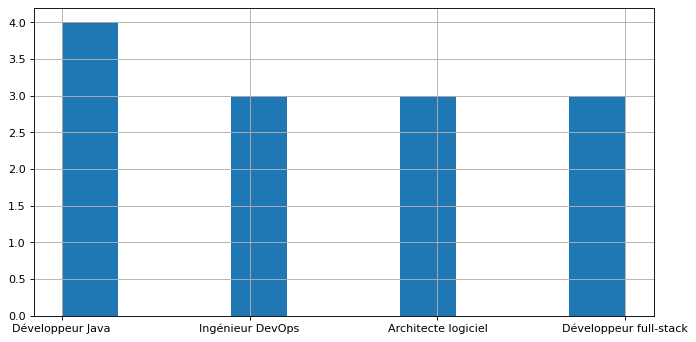

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


test = pd.read_csv('D:/projet_de_fin_formation/preselection_ml/machin_learning/mes_datas/fichiers_csv/Dataset.csv', encoding='iso-8859-1')
## Delete empty rows (In case I missed parsing a row)
test = test.dropna()
print("\n ** raw data **\n")
print(test.head())
print("\n ** data shape **\n")
print(test.shape)

fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
test.JOB_TITLE.hist()
print(test.columns)

In [14]:
## Lower case
test['description'] = test['description'].apply(lambda x: " ".join(x.lower()for x in x.split()))
## remove tabulation and punctuation
test['description'] = test['description'].str.replace('[^\w\s]',' ')
## digits
test['description'] = test['description'].str.replace('\d+', '')

#remove stop words
stop = stopwords.words('english')
test['description'] = test['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatization
test['description'] = test['description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print("Preprocessed data: \n")
print(test.head())

KeyError: 'description'

In [ ]:

with open('D:/work_dl/projet_python_ML/dataset_', 'r') as file:
    contenu = file.read()
    print(contenu)
    # Utilisez le contenu du fichier comme vous le souhaitez


In [4]:
%pip install pandas

In [6]:
import pandas as pd

with open('D:/work_dl/projet_python_ML/dataset_', 'r') as file:
    contenu = file.read()

# Créer un DataFrame à partir du contenu du fichier texte
df = pd.DataFrame({'Contenu': [contenu]})

# Enregistrer le DataFrame en tant que fichier Excel
df.to_excel('D:/work_dl/projet_python_ML/dataset_.xlsx', index=False)